In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


Most sold product: product       4
units_sold    1
dtype: int64
Customer who spends the most: customer      5
total_sale    5
dtype: int64


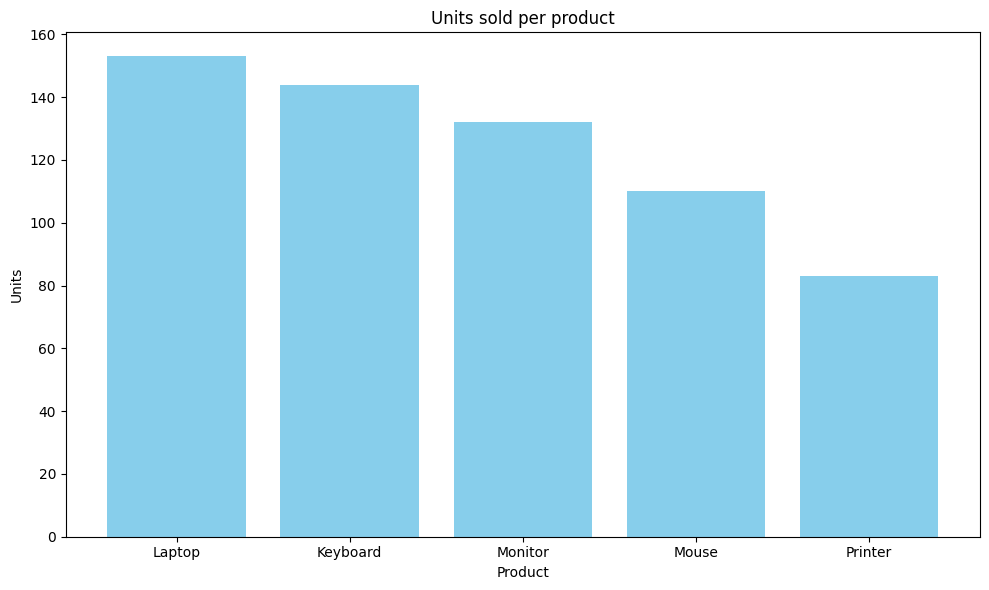

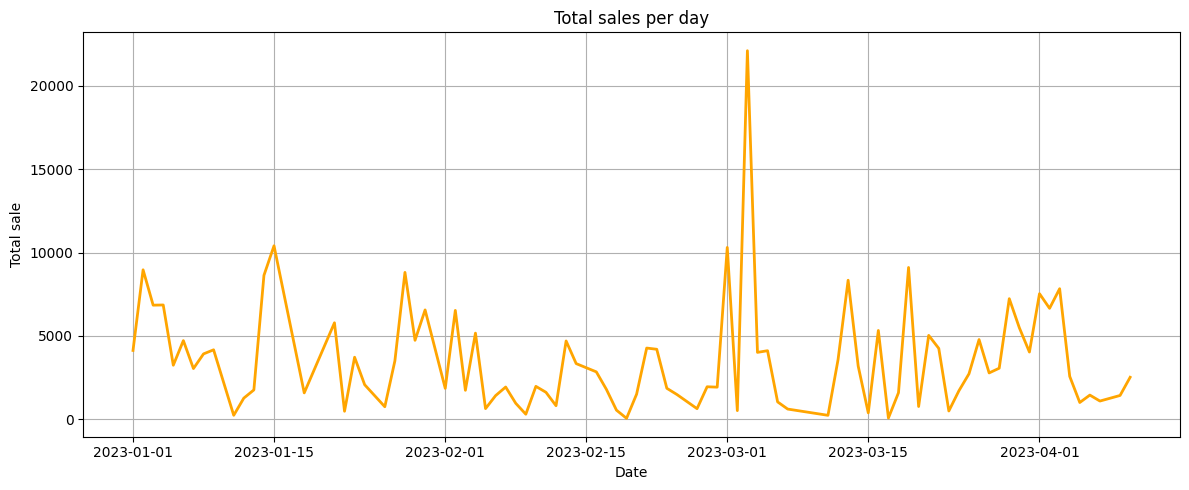

([<matplotlib.patches.Wedge at 0x7fb0b6a8eb90>,
 [Text(-0.9911935741806901, 0.47700660215861707, 'Accessories'),
  Text(0.9911936158819294, -0.47700651550571743, 'Electronics')],
 [Text(-0.5406510404621945, 0.26018541935924566, '35.7%'),
  Text(0.5406510632083251, -0.26018537209402764, '64.3%')])

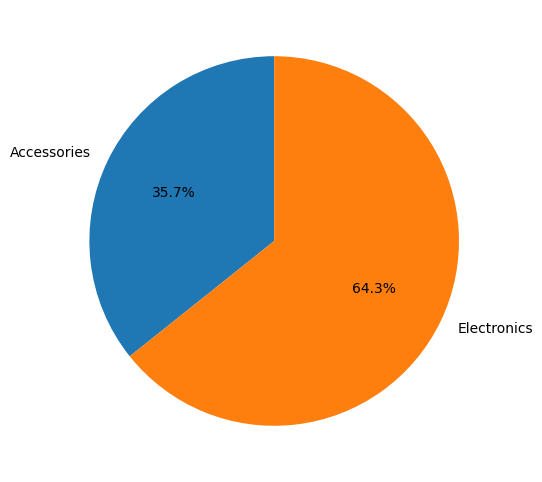

In [27]:
df = pd.read_csv('sales_data.csv')
df.head()
#df.describe()

#cleaning
df['date'] = pd.to_datetime(df['date'])
df.isnull().sum()
df[df.duplicated()]


#analysis

#IQR for outliers
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['unit_price'] < lower_bound) | (df['unit_price'] > upper_bound) ]
df = df.sort_values(by='date')

total_sales_product = df.groupby('product')['total_sale'].sum()
total_sales_category = df.groupby('category')['total_sale'].sum()
total_expense_client = df.groupby('customer')['total_sale'].sum().reset_index()
total_sale_month = df.groupby(df['date'].dt.to_period('M'))['total_sale'].sum()
units_per_product = df.groupby('product')['units_sold'].sum().reset_index()
most_sold = units_per_product.idxmax()
print('Most sold product:', most_sold)

most_expense = total_expense_client.idxmax()
print('Customer who spends the most:', most_expense)

#visualization
import matplotlib.pyplot as plt

#bar
sales = df.groupby('product')['units_sold'].sum().sort_values(ascending = False)
plt.figure(figsize=(10, 6))
plt.bar(sales.index, sales.values, color='skyblue')
plt.title('Units sold per product')
plt.xlabel('Product')
plt.ylabel('Units')
plt.tight_layout()
plt.show()

#lines
date = df['date']
sales_per_day = df.groupby('date')['total_sale'].sum()
plt.figure(figsize=(12, 5))
plt.plot(sales_per_day.index, sales_per_day.values, color='orange', linewidth = 2)
plt.title('Total sales per day')
plt.xlabel('Date')
plt.ylabel('Total sale')
plt.grid(True)
plt.tight_layout()
plt.show()

#pie
plt.figure(figsize=(6,6))
plt.pie(
    total_sales_category.values,
    labels=total_sales_category.index,
    autopct='%1.1f%%',
    startangle=90
)

In [33]:
#csv files

units_per_product = units_per_product.sort_values(by='units_sold',ascending=False)
units_per_product.to_csv('units_per_product.csv', index=False)

total_expense_client = total_expense_client.sort_values(by='total_sale', ascending=False)
total_expense_client.to_csv('total_expense_client.csv', index=False)

df.to_csv('clean_data.csv', index=False)


